## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import cufflinks as cf
cf.go_offline()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import metrics
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import Image

## 2. Loading Datasets

In [2]:
train=pd.read_csv('train.csv')

C:\Users\Soha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
test=pd.read_csv('test.csv')

In [4]:
train.shape

(969640, 9)

In [5]:
train.head(3)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 9 columns):
Id                969640 non-null int64
County            880040 non-null object
Province_State    917280 non-null object
Country_Region    969640 non-null object
Population        969640 non-null int64
Weight            969640 non-null float64
Date              969640 non-null object
Target            969640 non-null object
TargetValue       969640 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 66.6+ MB


In [7]:
test.shape

(311670, 8)

In [8]:
test.head(3)

,ForecastId,County,Province_State,Country_Region,Population,Weight,Date,Target
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-27,Fatalities
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311670 entries, 0 to 311669
Data columns (total 8 columns):
ForecastId        311670 non-null int64
County            282870 non-null object
Province_State    294840 non-null object
Country_Region    311670 non-null object
Population        311670 non-null int64
Weight            311670 non-null float64
Date              311670 non-null object
Target            311670 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 19.0+ MB


## 3. Data Cleaning

In [10]:
100*(train.isnull().sum())/(train.shape[0])

Id                0.000000
County            9.240543
Province_State    5.399942
Country_Region    0.000000
Population        0.000000
Weight            0.000000
Date              0.000000
Target            0.000000
TargetValue       0.000000
dtype: float64

In [11]:
train.drop(['County','Province_State'],axis=1,inplace=True)

In [12]:
test.drop(['County','Province_State'],axis=1,inplace=True)

## 4. Feature Engineering

In [13]:
train['Date']=pd.to_datetime(train['Date'])

In [14]:
train['Month']=train['Date'].apply(lambda x :x.month)

In [15]:
train['Day']=train['Date'].apply(lambda x :x.day)

In [16]:
train.drop(['Date'],axis=1,inplace=True)

In [17]:
train.head(3)

,Id,Country_Region,Population,Weight,Target,TargetValue,Month,Day
0,1,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23
1,2,Afghanistan,27657145,0.583587,Fatalities,0,1,23
2,3,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,24


In [18]:
test['Date']=pd.to_datetime(test['Date'])

In [19]:
test['Month']=test['Date'].apply(lambda x :x.month)

In [20]:
test['Day']=test['Date'].apply(lambda x :x.day)

In [21]:
test.drop(['Date'],axis=1,inplace=True)

In [22]:
test.head(3)

,ForecastId,Country_Region,Population,Weight,Target,Month,Day
0,1,Afghanistan,27657145,0.058359,ConfirmedCases,4,27
1,2,Afghanistan,27657145,0.583587,Fatalities,4,27
2,3,Afghanistan,27657145,0.058359,ConfirmedCases,4,28


## 5. Exploratory Data Analysis

### 5.1. Analysing Worldwide Cases 

#### 5.1.1. Total Share of Worldwide COVID19 Confirmed Cases

In [23]:
confirmed=train[train['Target']=='ConfirmedCases']

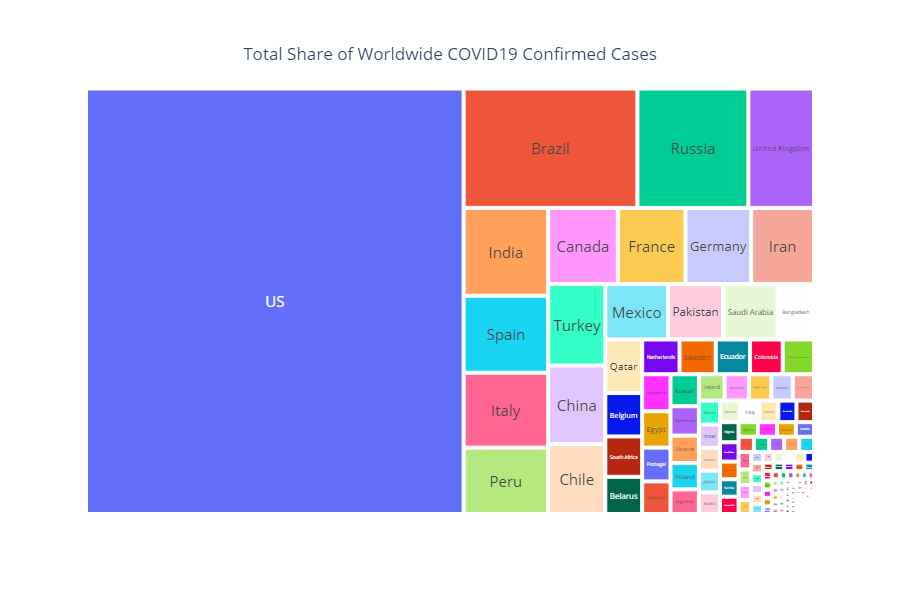

In [111]:
fig = px.treemap(confirmed, path=['Country_Region'], values='TargetValue',width=900, height=600)
fig.update_traces(textposition='middle center', textfont_size=15)
fig.update_layout(
    title={
        'text': 'Total Share of Worldwide COVID19 Confirmed Cases',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

#### 5.1.2. Total Share of Worldwide COVID19 Fatalities

In [25]:
dead=train[train['Target']=='Fatalities']

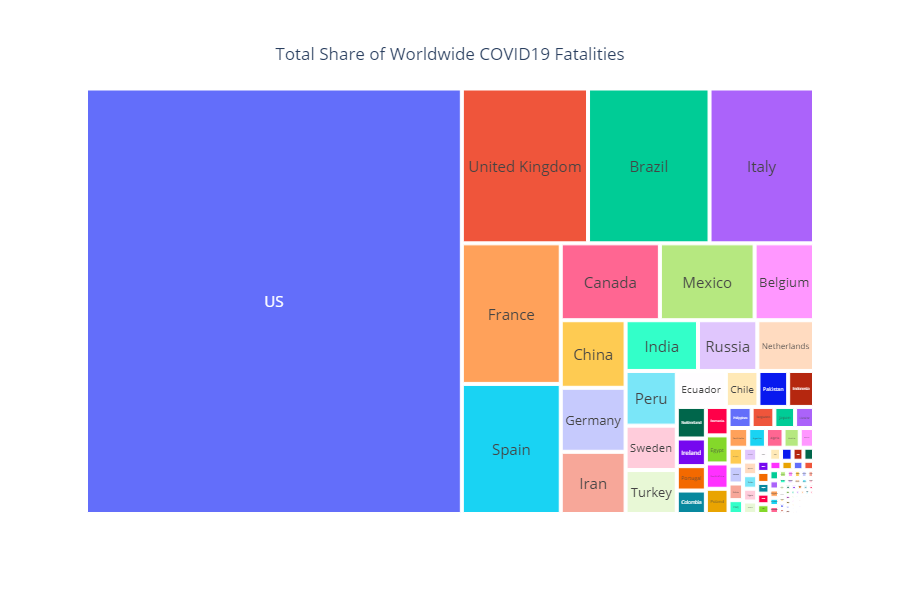

In [112]:
fig = px.treemap(dead, path=['Country_Region'], values='TargetValue',width=900,height=600)
fig.update_traces(textposition='middle center', textfont_size=15)
fig.update_layout(
    title={
        'text': 'Total Share of Worldwide COVID19 Fatalities',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

#### 5.1.3. Top 20 Countries in Population

In [27]:
pop=train.groupby('Country_Region').max().sort_values(by='Population',ascending=False).head(20)

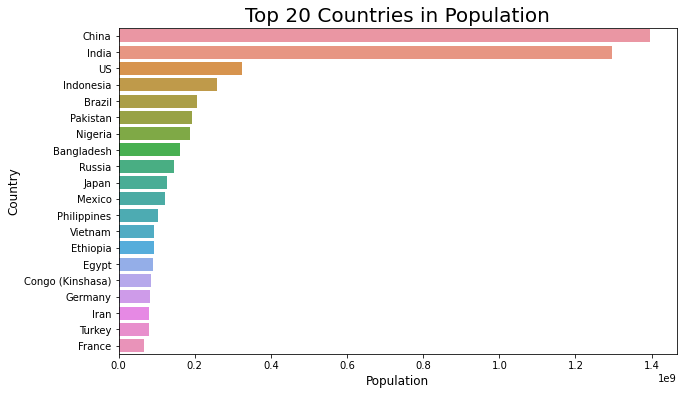

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='Population',y=list(pop.index), data=pop)
plt.xlabel('Population',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Top 20 Countries in Population',fontsize=20)
plt.show()

#### 5.1.4. Top 20 Countries in Confirmed Cases

In [29]:
top_confirmed=confirmed.groupby('Country_Region').sum().sort_values(by='TargetValue',ascending=False).head(20)

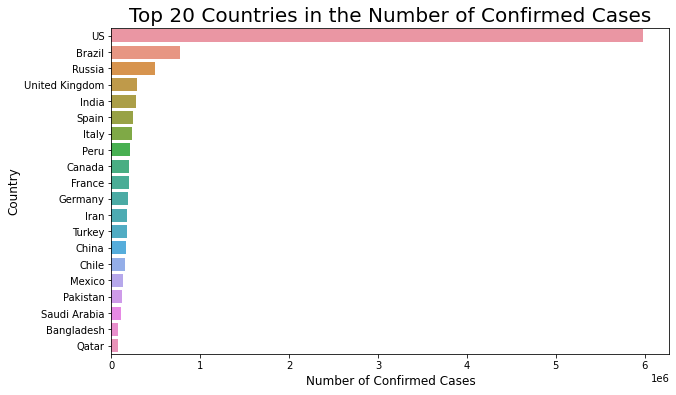

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x='TargetValue',y=list(top_confirmed.index), data=top_confirmed)
plt.xlabel('Number of Confirmed Cases',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Top 20 Countries in the Number of Confirmed Cases',fontsize=20)
plt.show()

#### 5.1.5. Top 20 Countries in Fatalities

In [31]:
top_dead=dead.groupby('Country_Region').sum().sort_values(by='TargetValue', ascending=False).head(20)

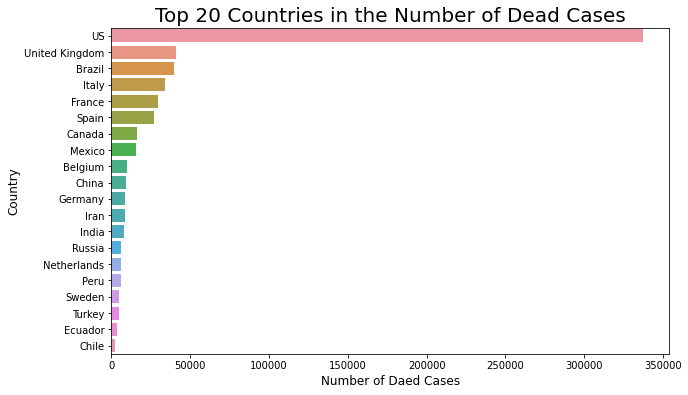

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='TargetValue',y=list(top_dead.index), data=top_dead)
plt.xlabel('Number of Daed Cases',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Top 20 Countries in the Number of Dead Cases',fontsize=20)
plt.show()

#### 5.1.6. Fatalities vs Confirmed Cases

In [33]:
confirmed['TargetValue'].sum()

11528819

In [34]:
dead['TargetValue'].sum()

653271

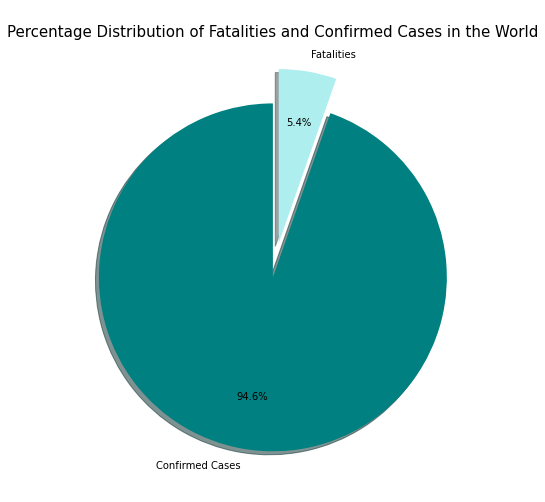

In [35]:
plt.figure(figsize = (8,8))
plt.pie(x=[11528819,653271],labels=['Confirmed Cases','Fatalities'], autopct='%1.1f%%',pctdistance=0.7,labeldistance=1.1, explode=(0,0.2),shadow=True,startangle=90,colors= ['teal','paleturquoise'], data=train)
plt.title('\nPercentage Distribution of Fatalities and Confirmed Cases in the World\n',loc='center',fontsize=15)
plt.show()

In [36]:
x=confirmed['TargetValue'].max()
y=confirmed[confirmed['TargetValue']==confirmed['TargetValue'].max()]['Day'].values[0]
z=confirmed[confirmed['TargetValue']==confirmed['TargetValue'].max()]['Month'].values[0]
v=confirmed[confirmed['TargetValue']==confirmed['TargetValue'].max()]['Country_Region'].values[0]
print(f'The highest number of confirmed cases in the world is {x} which was recorded in day {y} of month {z} in {v}.')

The highest number of confirmed cases in the world is 36163 which was recorded in day 24 of month 4 in US.


#### 5.1.7. Worldwide Confirmed/Death Cases Over Time

In [37]:
confirmed_month_value=confirmed[['TargetValue','Month']]

In [38]:
sum_confirmed_month_value=confirmed_month_value.groupby('Month').sum()

In [39]:
sum_confirmed_month_value.columns=['Confirmed Cases']

In [40]:
dead_month_value=dead[['TargetValue','Month']]

In [41]:
sum_dead_month_value=dead_month_value.groupby('Month').sum()

In [42]:
sum_dead_month_value.columns=['Dead Cases']

In [121]:
fig=pd.merge(sum_confirmed_month_value,sum_dead_month_value, on='Month').iplot(kind='bar',color=['yellowgreen','green'], title='Worldwide Confirmed/Death Cases Over Time')

AttributeError: 'NoneType' object has no attribute 'show'

In [120]:
from plotly.offline.offline import _plot_html

ImportError: cannot import name '_plot_html' from 'plotly.offline.offline' (C:\Users\Soha\Anaconda3\lib\site-packages\plotly\offline\offline.py)

### 5.2. Analysing Cases in India

In [44]:
india=train[train['Country_Region']=='India']

In [45]:
india.shape

(280, 8)

In [46]:
india.head(3)

,Id,Country_Region,Population,Weight,Target,TargetValue,Month,Day
40320,40321,India,1295210000,0.04766,ConfirmedCases,0,1,23
40321,40322,India,1295210000,0.47660,Fatalities,0,1,23
40322,40323,India,1295210000,0.04766,ConfirmedCases,0,1,24


In [47]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 40320 to 40599
Data columns (total 8 columns):
Id                280 non-null int64
Country_Region    280 non-null object
Population        280 non-null int64
Weight            280 non-null float64
Target            280 non-null object
TargetValue       280 non-null int64
Month             280 non-null int64
Day               280 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 19.7+ KB


#### 5.2.1. Confirmed Cases in India

In [48]:
conf_ind=india[india['Target']=='ConfirmedCases']

In [49]:
conf_ind.reset_index(inplace=True)

In [50]:
conf_ind.drop(['index'],axis=1,inplace=True)

In [51]:
conf_ind.head(2)

,Id,Country_Region,Population,Weight,Target,TargetValue,Month,Day
0,40321,India,1295210000,0.04766,ConfirmedCases,0,1,23
1,40323,India,1295210000,0.04766,ConfirmedCases,0,1,24


In [52]:
x=conf_ind['TargetValue'].max()
y=conf_ind[conf_ind['TargetValue']==conf_ind['TargetValue'].max()]['Day'].values[0]
z=conf_ind[conf_ind['TargetValue']==conf_ind['TargetValue'].max()]['Month'].values[0]
print(f'The highest number of confirmed cases in India is {x} which was recorded in day {y} of month {z}.')

The highest number of confirmed cases in India is 10864 which was recorded in day 7 of month 6.


#### 5.2.2. Dead cases in India

In [53]:
dd_ind=india[india['Target']=='Fatalities']

In [54]:
dd_ind.reset_index(inplace=True)

In [55]:
dd_ind.drop(['index'],axis=1,inplace=True)

In [56]:
dd_ind.head(2)

,Id,Country_Region,Population,Weight,Target,TargetValue,Month,Day
0,40322,India,1295210000,0.4766,Fatalities,0,1,23
1,40324,India,1295210000,0.4766,Fatalities,0,1,24


In [57]:
x=dd_ind['TargetValue'].max()
y=dd_ind[dd_ind['TargetValue']==dd_ind['TargetValue'].max()]['Day'].values[0]
z=dd_ind[dd_ind['TargetValue']==dd_ind['TargetValue'].max()]['Month'].values[0]
print(f'The highest number of confirmed cases in India is {x} which was recorded in day {y} of month {z}.')

The highest number of confirmed cases in India is 297 which was recorded in day 6 of month 6.


#### 5.2.3. Monthly Number of Confirmed and Dead Cases

In [58]:
mon_conf_ind=conf_ind.groupby('Month').sum()

In [59]:
mon_dd_ind=dd_ind.groupby('Month').sum()

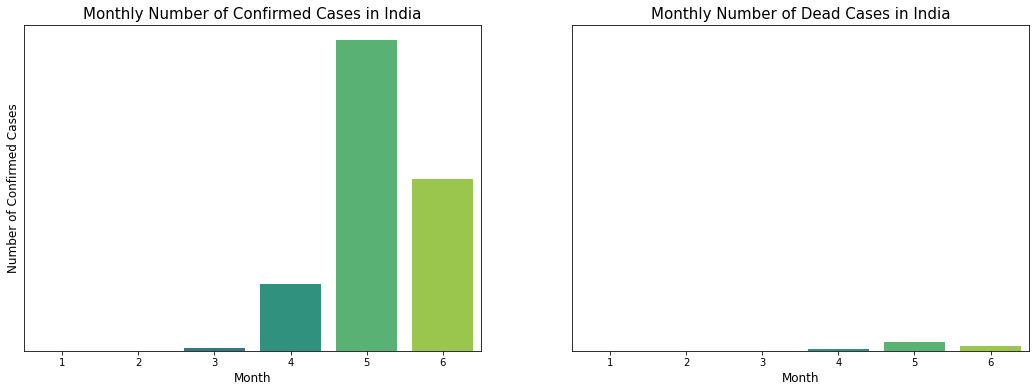

In [60]:
plt.figure(figsize=(18,6))

ax1=plt.subplot(1,2,1)
sns.barplot(x=mon_conf_ind.index, y='TargetValue', data=mon_conf_ind,palette='viridis')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Number of Confirmed Cases',fontsize=12)
plt.title('Monthly Number of Confirmed Cases in India',fontsize=15)

ax2=plt.subplot(1,2,2,sharey=ax1)
sns.barplot(x=mon_dd_ind.index, y='TargetValue', data=mon_dd_ind,palette='viridis')
plt.xlabel('Month',fontsize=12)
plt.ylabel('')
ax2.set_yticks([])
plt.title('Monthly Number of Dead Cases in India',fontsize=15)

plt.show()

#### 5.2.4. Fatalities Versus Confirmed Cases in India

In [61]:
conf_ind['TargetValue'].sum()

276583

In [62]:
dd_ind['TargetValue'].sum()

7745

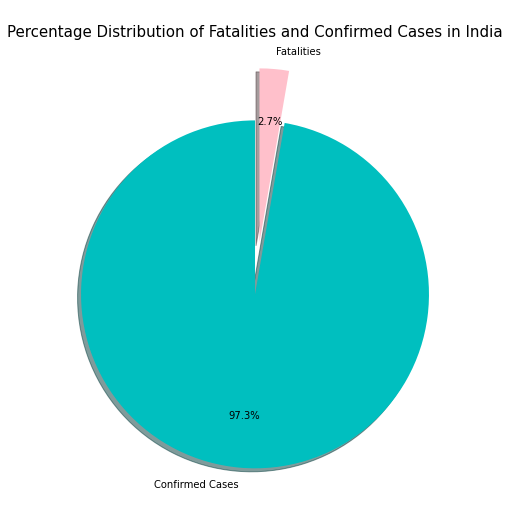

In [63]:
plt.figure(figsize = (8,8))
plt.pie(x=[276583,7745], labels=['Confirmed Cases','Fatalities'],pctdistance=0.7,labeldistance=1.1,autopct='%1.1f%%', explode=(0,0.3), shadow=True,colors=['c','pink'],startangle=90, data=india)
plt.title('\nPercentage Distribution of Fatalities and Confirmed Cases in India\n\n',loc='center',fontsize=15)
plt.show()

## 6. Prediction of ConfirmedCases/Fatalities in Train Dataset

### 6.1. Label Encoding

**Country**

In [64]:
le1=LabelEncoder()

In [65]:
le1.fit(train['Country_Region'])

LabelEncoder()

In [66]:
train['Encoded_Country']=le1.transform(train['Country_Region'])

**Target**

In [67]:
le2=LabelEncoder()

In [68]:
le2.fit(train['Target'])

LabelEncoder()

In [69]:
train['Encoded_Target']=le2.transform(train['Target'])

In [70]:
train.head(3)

,Id,Country_Region,Population,Weight,Target,TargetValue,Month,Day,Encoded_Country,Encoded_Target
0,1,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23,0,0
1,2,Afghanistan,27657145,0.583587,Fatalities,0,1,23,0,1
2,3,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,24,0,0


### 6.2. Splitting Data into Train and Test Subsets

In [71]:
y=train['TargetValue']
X=train[['Encoded_Country','Encoded_Target','Weight','Month','Day']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### 6.3. Random Forest Regressor

In [73]:
rf=RandomForestRegressor()

In [74]:
rf.fit (X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [75]:
predictions_rf=rf.predict(X_test)

In [76]:
print('RMSE_Random Forest Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_rf)))
print('R2 Score_Random Forest Regression=',metrics.r2_score(y_test,predictions_rf))

RMSE_Random Forest Regression= 70.92926657191644
R2 Score_Random Forest Regression= 0.9482705452629869


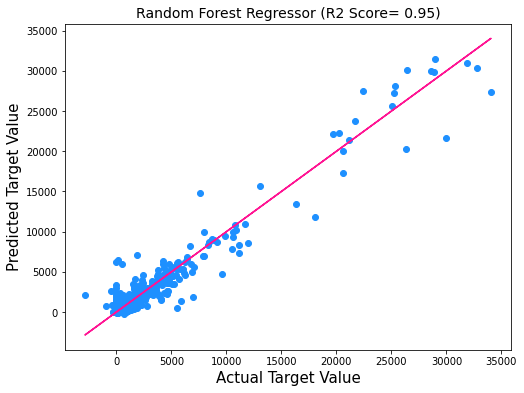

In [77]:
plt.figure(figsize=(8,6))
plt.plot(y_test,y_test,color='deeppink')
plt.scatter(y_test,predictions_rf,color='dodgerblue')
plt.xlabel('Actual Target Value',fontsize=15)
plt.ylabel('Predicted Target Value',fontsize=15)
plt.title('Random Forest Regressor (R2 Score= 0.95)',fontsize=14)
plt.show()

### 6.4. XGBoost Regressor

In [78]:
xgbr= xgb.XGBRegressor(n_estimators=800, learning_rate=0.01, gamma=0, subsample=.7,
                       colsample_bytree=.7, max_depth=10,
                       min_child_weight=0, 
                       objective='reg:squarederror', nthread=-1, scale_pos_weight=1,
                       seed=27, reg_alpha=0.00006, n_jobs=-1)

In [79]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=27, reg_alpha=6e-05,
             reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
prediction_xgbr=xgbr.predict(X_test)

In [81]:
print('RMSE_XGBoost Regression=', np.sqrt(metrics.mean_squared_error(y_test,prediction_xgbr)))
print('R2 Score_XGBoost Regression=',metrics.r2_score(y_test,prediction_xgbr))

RMSE_XGBoost Regression= 104.03036184811347
R2 Score_XGBoost Regression= 0.8887225459942268


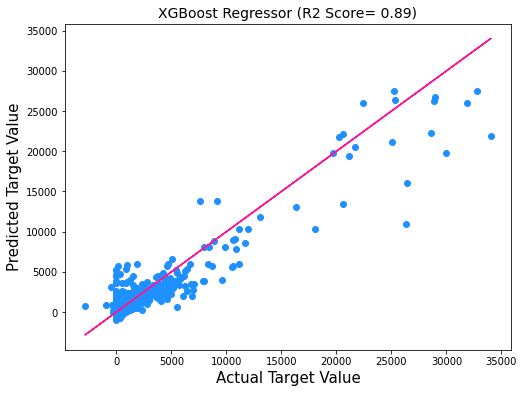

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=prediction_xgbr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Target Value',fontsize=15)
plt.ylabel('Predicted Target Value',fontsize=15)
plt.title('XGBoost Regressor (R2 Score= 0.89)',fontsize=14)
plt.show()

## 7. Preprocessing the Test Dataset

### 7.1. Label Encoding 

**Country**

In [83]:
le3=LabelEncoder()

In [84]:
le3.fit(test['Country_Region'])

LabelEncoder()

In [85]:
test['Encoded_Country']=le3.transform(test['Country_Region'])

**Target**

In [86]:
le4=LabelEncoder()

In [87]:
le4.fit(test['Target'])

LabelEncoder()

In [88]:
test['Encoded_Target']=le4.transform(test['Target'])

In [89]:
test=test[['Encoded_Country','Encoded_Target','Weight','Month','Day']]

In [90]:
test.head(3)

,Encoded_Country,Encoded_Target,Weight,Month,Day
0,0,0,0.058359,4,27
1,0,1,0.583587,4,27
2,0,0,0.058359,4,28


## 8. Prediction of ConfirmedCases/Fatalities in the Test Dataset

In [91]:
pred=xgbr.predict(test)

## 9. Submission of the Results

In [92]:
submission=pd.read_csv('submission.csv')

In [93]:
submission.head(3)

,ForecastId_Quantile,TargetValue
0,1_0.05,163.335785
1,2_0.05,0.082656
2,3_0.05,151.497299


In [94]:
test_1=pd.read_csv('test.csv')

In [95]:
output=pd.DataFrame({'Id':test_1['ForecastId'], 'TargetValue':pred})

In [96]:
a=output.groupby(['Id']).quantile(q=0.05).reset_index()
b=output.groupby(['Id']).quantile(q=0.5).reset_index()
c=output.groupby(['Id']).quantile(q=0.95).reset_index()

In [97]:
a.columns=['Id','q0.05']
b.columns=['Id','q0.5']
c.columns=['Id','q0.95']

In [98]:
a['q0.5']=b['q0.5']
a['q0.95']=c['q0.95']

In [99]:
sub=pd.melt(a, id_vars=['Id'], value_vars=['q0.05','q0.5','q0.95'])

In [100]:
sub['variable']=sub['variable'].apply(lambda x: x.replace('q',''))

In [101]:
sub['var']=sub['variable'].apply(lambda x: str(x))

In [102]:
sub['id']=sub['Id'].apply(lambda x: str(x))

In [103]:
sub['ForecastId_Quantile']=sub['id']+'_'+sub['var']

In [104]:
sub.drop(['Id','variable','var','id'],axis=1,inplace=True)

In [105]:
sub.columns=['TargetValue','ForecastId_Quantile']

In [106]:
sub=sub[['ForecastId_Quantile','TargetValue']]

In [107]:
sub.head(3)

,ForecastId_Quantile,TargetValue
0,1_0.05,163.335785
1,2_0.05,0.082656
2,3_0.05,151.497299


In [108]:
sub.to_csv("submission.csv",index=False)

## 10. Conclusion

In this notebook, we used COVID19 Global Forecasting (Week 5) dataset and performed the following steps:

- We performed detailed exploratory data analysis on the train dataset and determined the population of Confirmed Cases and Fatalities in various locations and in different months.

- We implemented ensemble learning algorithms including XGBoost and Random Forest regressors to predict the daily number of confirmed COVID19 cases as well as the number of resulting fatalities in various locations across the world. The R2 Scores of these two models are 0.89 and 0.95, respectively.